<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

In [7]:
df.fillna('N/A')

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
430,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
431,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
432,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [12]:
df.replace('?', 'N/A')

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,N/A
1,democrat,N/A,y,y,N/A,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,N/A,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,N/A,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
430,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
431,republican,n,N/A,n,y,y,y,n,n,n,n,y,y,y,y,n,y
432,republican,n,n,n,y,y,y,N/A,N/A,N/A,N/A,n,y,y,y,n,y


In [19]:
df.describe()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
count,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,235,194,253,247,211,271,239,242,207,215,264,233,208,247,232,268


In [20]:
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [0]:
mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [22]:
abs(mu - np.mean(sample)) < 0.01 
#verify mean of the saample

True

In [23]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

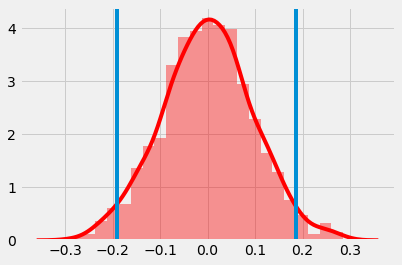

In [26]:
style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

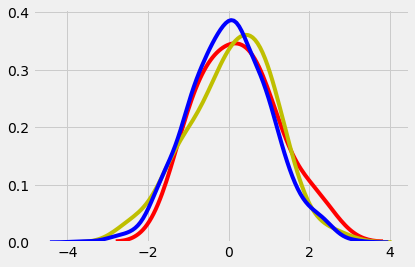

In [32]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');


In [33]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: 0.2450520762667384
Standard Deviation: 0.9383301813040826
Variance: 0.8804635291461527
t - distribution with 100 degrees of freedom
------------------------------
Mean: 0.08715798756252889
Standard Deviation: 1.0454677207398053
Variance: 1.0930027551088835
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.017667452901622405
Standard Deviation: 1.016310486625476
Variance: 1.032887005224912
